In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [5]:
df.info()
#There are no missing values in the total_bedrooms attribute dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)
df.isnull().sum()
# The missing values has been handled and now as it can be observed there are no missing or NaN values.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

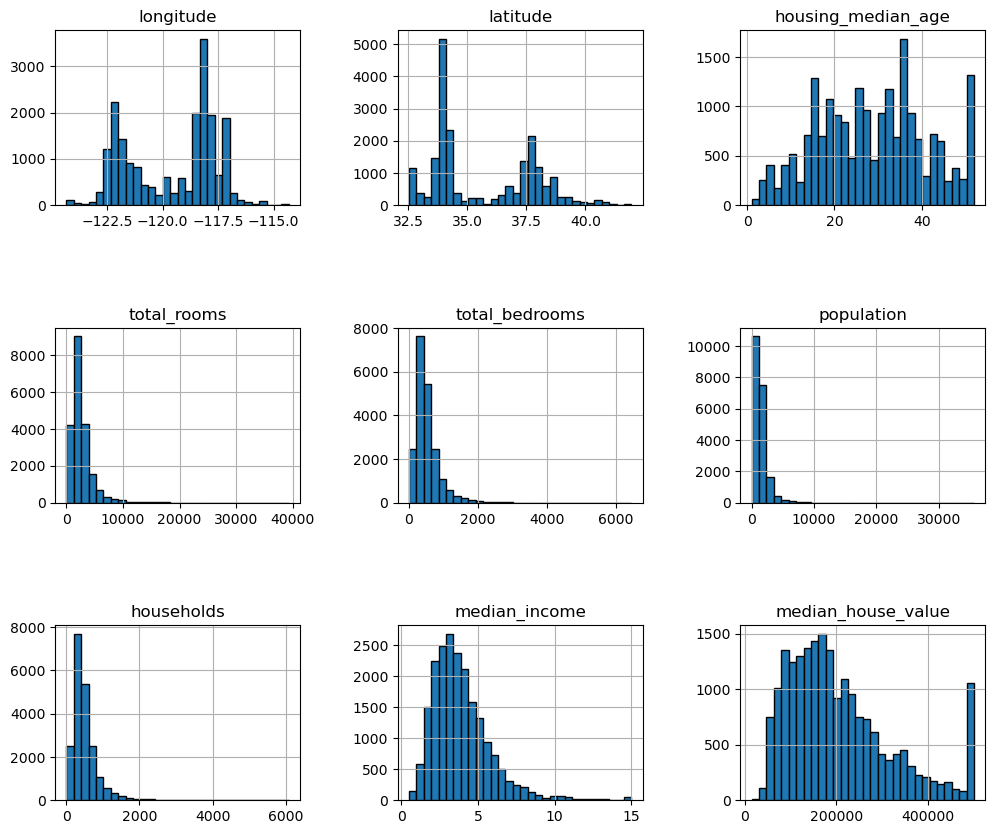

In [7]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
# Here is the histogram plot for all the attributes of california dataset that was picked up by us from kaggle.

In [8]:
attributes_of_interest = ["total_rooms", "total_bedrooms", "households", "population"]
df[attributes_of_interest].describe()
#For each of these features, comparing the max and 75% values, we can see a slight difference. It confirms the intuitions that there are a couple of extreme values.

,total_rooms,total_bedrooms,households,population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,2635.763081,537.870553,499.539680,1425.476744
std,2181.615252,419.266592,382.329753,1132.462122
min,2.000000,1.000000,1.000000,3.000000
25%,1447.750000,297.000000,280.000000,787.000000
50%,2127.000000,438.000000,409.000000,1166.000000
75%,3148.000000,643.250000,605.000000,1725.000000
max,39320.000000,6445.000000,6082.000000,35682.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8716\3087970650.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['longitude'])


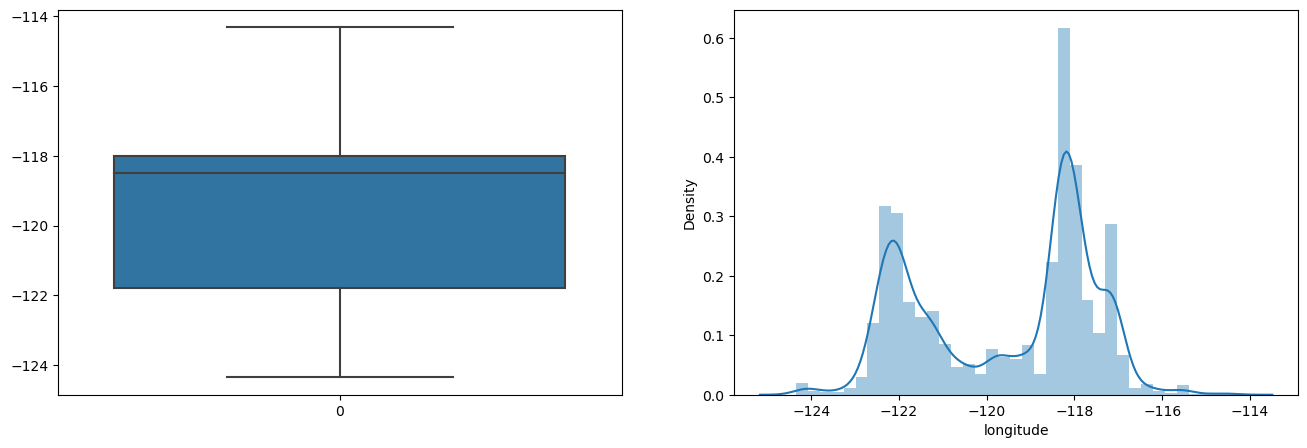

In [9]:
#Outlier Detection:-
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['longitude'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['longitude'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8716\1685219727.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['latitude'])


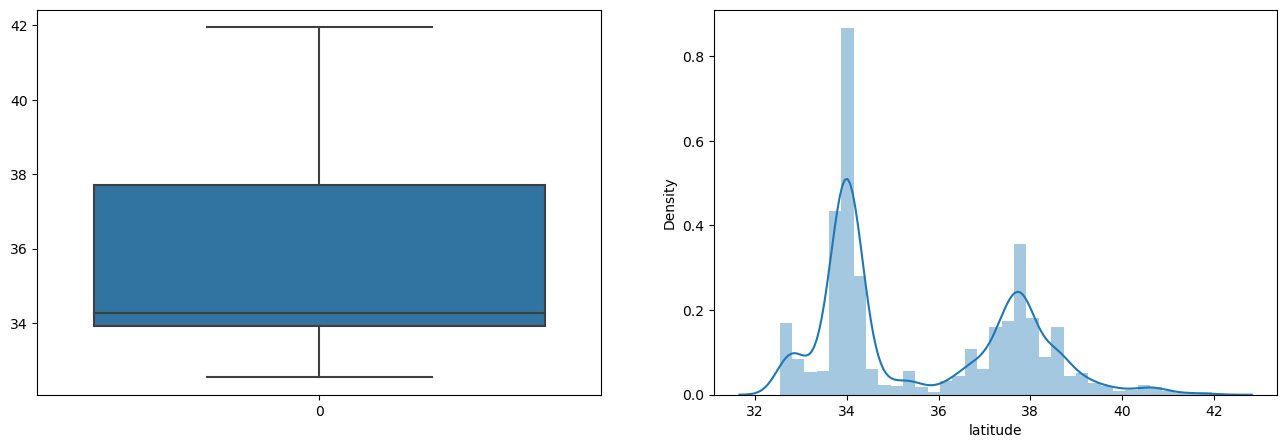

In [10]:
#Box Plot Technique for Outliers:-
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['latitude'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['latitude'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8716\1735533343.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['total_bedrooms'])


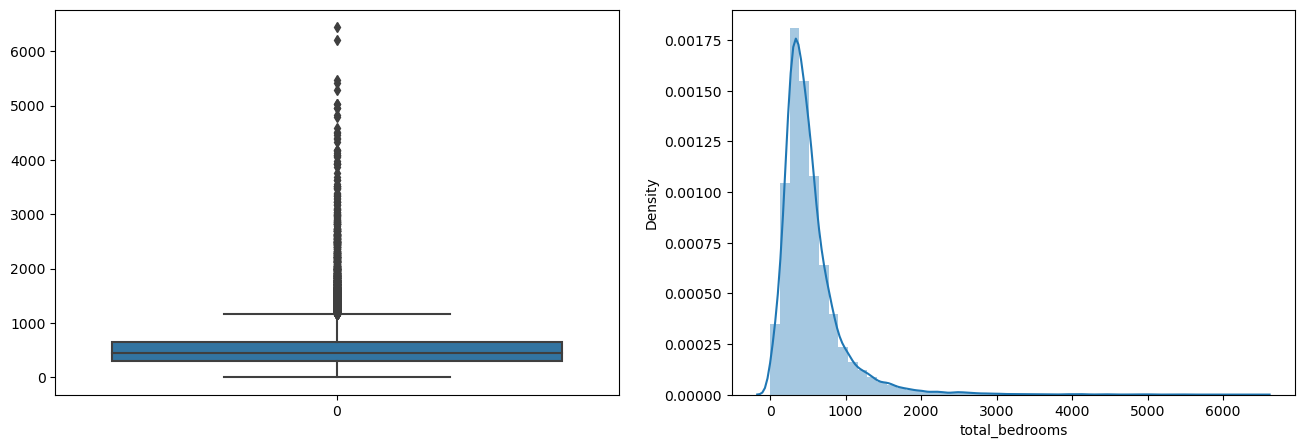

In [11]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['total_bedrooms'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['total_bedrooms'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8716\2186852716.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['median_income'])


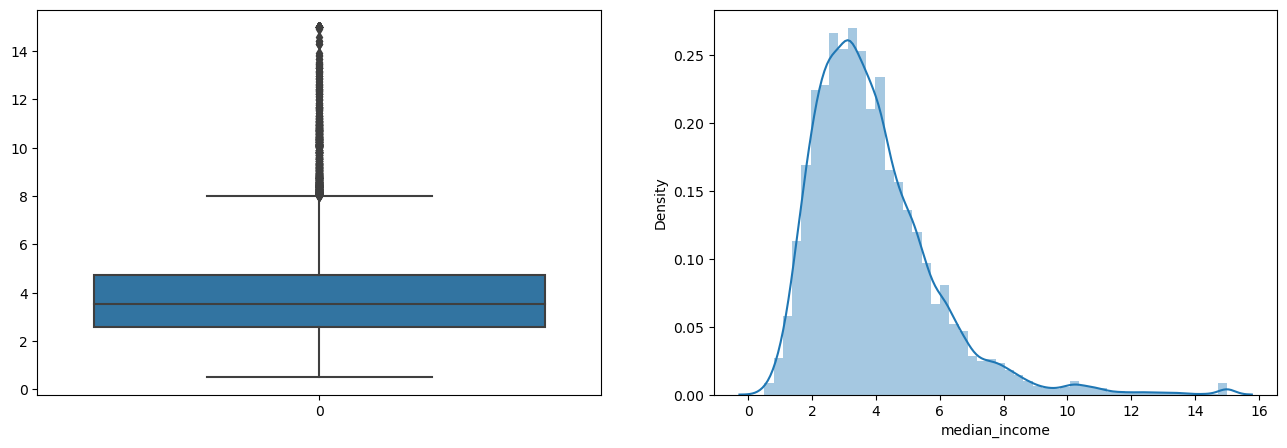

In [12]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['median_income'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['median_income'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8716\799493198.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(df['median_house_value'])


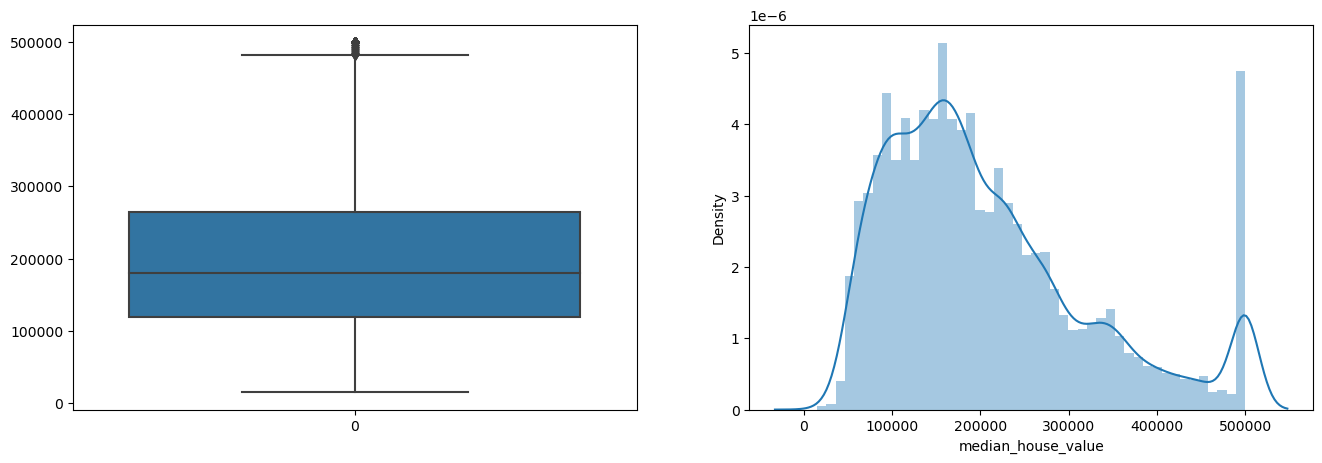

In [13]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt1 = sns.boxplot(df['median_house_value'])
plt.subplot(1,2,2)
plt2 = sns.distplot(df['median_house_value'])

In [14]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8716\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [15]:
print(df.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


<Axes: >

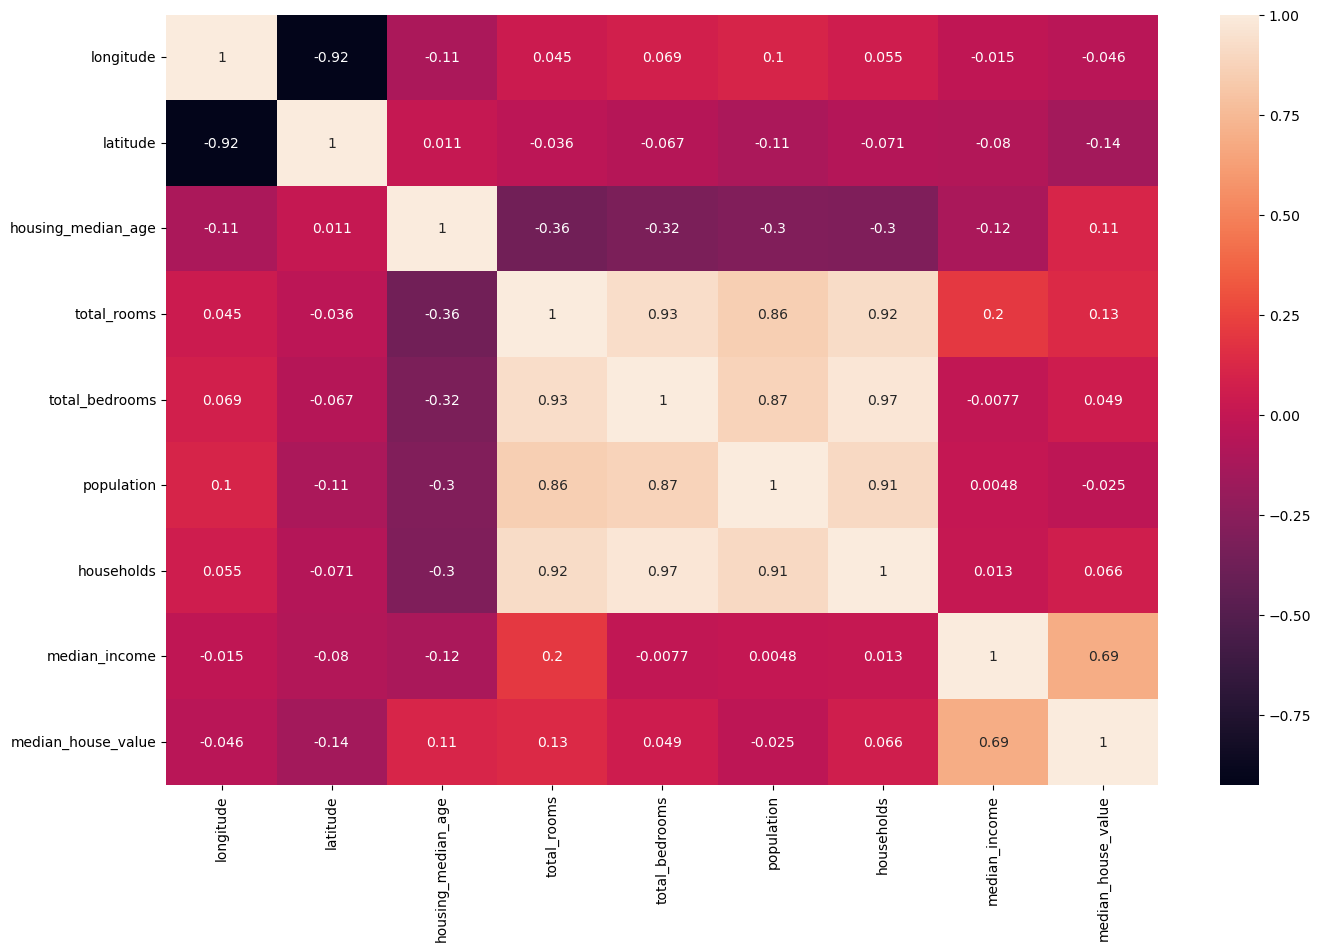

In [18]:
#Heatmap Representation of Correlated variables.
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True)

In [19]:
#Determination of values a and b from the provided distance formula where a = Direction Vector; b = Point on a line.
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Function to compute distance from a point to a line
def distance_to_line(p, a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(np.dot(np.identity(2) - np.outer(a, a), p - b))

# Function to minimize total squared distance from houses to line
def minimize_total_squared_distance(houses, a, b):
    total_squared_distance = sum(distance_to_line(house, a, b)**2 for house in houses)
    return total_squared_distance

# Function to find best-fitted line for a cluster
def find_best_fitted_line(houses_cluster):
    # Extract latitude and longitude separately
    latitudes = houses_cluster[:, 0]  # Latitude
    longitudes = houses_cluster[:, 1]  # Longitude
    
    # No need for optimization in this function, simply return latitude and longitude
    return latitudes, longitudes

# Main algorithm
def construct_gas_pipeline(houses, num_clusters):
    # Cluster houses into groups
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_indices = kmeans.fit_predict(houses)
    
    # Initialize lists to store lines for each cluster
    lines = []
    
    # Find best-fitted line for each cluster
    for cluster_id in range(num_clusters):
        houses_cluster = houses[cluster_indices == cluster_id]
        a, b = find_best_fitted_line(houses_cluster)
        lines.append((a, b))
    
    # Combine lines obtained for each cluster to form a single line
    combined_a = np.mean(np.concatenate([line[0] for line in lines]))
    combined_b = np.mean(np.concatenate([line[1] for line in lines]))
    
    return combined_a, combined_b

# Preprocessing: Extract latitude and longitude
houses = df[['latitude', 'longitude']].values

# Example usage
num_clusters = 2  # Number of clusters
a, b = construct_gas_pipeline(houses, num_clusters)
print("Direction vector (a- Latitude):", a)
print("Point on line (b- Longitude):", b)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Direction vector (a- Latitude): 35.63186143410853
Point on line (b- Longitude): -119.56970445736435
